In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pickle
import pprint
from glob import glob
os.chdir('/home/users/alexno/sleep-staging')

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import umap
import umap.plot
from h5py import File

sns.set(context='paper', rc={'figure.figsize':(14,10)})

HYP_DICT = {0: 'W', 1: 'N1', 2: 'N2', 3: 'N3', 4: 'R'}

In [3]:
df = pd.read_csv('overview_file_cohortsEM-ling1.csv')
# display(df.head())
available_predictions = glob("experiments/**/SSC-WSC_test_predictions.pkl", recursive=True)
pprint.pprint(available_predictions)

['experiments/massc/avg_kw21_rnn128/20201209_025443/SSC-WSC_test_predictions.pkl',
 'experiments/massc/att30/20201124_080609/SSC-WSC_test_predictions.pkl',
 'experiments/massc/avg_kw21_rnn128_cyclic/20201212_150902/SSC-WSC_test_predictions.pkl',
 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl']


In [4]:
selected_experiment = 'experiments/massc/avg_kw21/20201126_043826/SSC-WSC_test_predictions.pkl'
with open(selected_experiment, 'rb') as f:
    predictions = pickle.load(f)
list_studies = list(predictions.keys())
df_preds = pd.read_csv(os.path.join(os.path.dirname(selected_experiment), 'SSC-WSC_test_results.csv'), index_col=0)
df_preds = pd.merge(left=df_preds, right=df[['ID', 'Diagnosis', 'Label']], how='left', right_on='ID', left_on='SubjectID')
display(df_preds.query('Label == 0').sort_values('Balanced accuracy', ascending=False))
print(f"Unique classes: {df_preds['Diagnosis'].unique()}")
print(f"Window unique classes: {df_preds['Window'].unique()}")
print(f"Case unique classes: {df_preds['Case'].unique()}")
display(df_preds.query('Label == 1'))

FileID       SubjectID Window Case  Accuracy  \
52   A1038_4 172720.h5  A1038_4 172720    1 s  all  0.849057   
508      SSC_6856_1.h5      SSC_6856_1    1 s  all  0.876377   
150  C1040_4 181859.h5  C1040_4 181859    1 s  all  0.883333   
507      SSC_6854_1.h5      SSC_6854_1    1 s  all  0.831891   
220  C9145_2 172540.h5  C9145_2 172540    1 s  all  0.840263   
..                 ...             ...    ...  ...       ...   
396      SSC_5280_1.h5      SSC_5280_1    1 s  all  0.474593   
514      SSC_6927_1.h5      SSC_6927_1    1 s  all  0.745384   
120  C0605_4 173848.h5  C0605_4 173848    1 s  all  0.544211   
411      SSC_5458_1.h5      SSC_5458_1    1 s  all  0.581797   
544      SSC_7444_1.h5      SSC_7444_1    1 s  all  0.488608   

     Balanced accuracy     Kappa        F1  Precision    Recall  ...  \
52            0.894873  0.795451  0.830931   0.806470  0.894873  ...   
508           0.892037  0.811801  0.784684   0.733296  0.892037  ...   
150           0.888253  0.817163  0.776490   0.769768  0.888253  ...   
507           0.884168  0.776560  0.818131   0.812352  0.884168  ...   
220           0.883908  0.773819  0.750679   0.725847  0.883908  ...   
..                 ...       ...       ...        ...       ...  ...   
396           0.530022  0.314027  0.395287   0.529237  0.530022  ...   
514           0.509478  0.571534  0.427622   0.547962  0.407582  ...   
120           0.508400  0.353138  0.490093   0.615286  0.508400  ...   
411           0.489882  0.341106  0.294390   0.314674  0.293929  ...   
544           0.485583  0.329580  0.400007   0.485003  0.485583  ...   

     Precision - N3  Recall - N3  Support - N3  F1 - REM  Precision - REM  \
52         0.548148     0.986667          75.0  0.985782         0.971963   
508        0.480519     1.000000          37.0  0.880000         0.785714   
150        0.842593     0.900990         101.0  0.973294         0.959064   
507        0.847134     1.000000         133.0  0.921348         0.901099   
220        0.407407     1.000000          55.0  0.945736         0.978610   
..              ...          ...           ...       ...              ...   
396        0.940476     0.763285         207.0  0.145631         0.078534   
514        0.000000     0.000000           0.0  0.907104         0.861592   
120        0.000000     0.000000           0.0  0.500000         0.774194   
411        0.000000     0.000000           0.0  0.000000         0.000000   
544        0.093750     0.136364          22.0  0.690058         0.536364   

     Recall - REM  Support - REM              ID                 Diagnosis  \
52       1.000000          104.0  A1038_4 172720  'NON-NARCOLEPSY CONTROL'   
508      1.000000           33.0      SSC_6856_1  'NON-NARCOLEPSY CONTROL'   
150      0.987952          166.0  C1040_4 181859  'NON-NARCOLEPSY CONTROL'   
507      0.942529           87.0      SSC_6854_1  'NON-NARCOLEPSY CONTROL'   
220      0.915000          200.0  C9145_2 172540  'NON-NARCOLEPSY CONTROL'   
..            ...            ...             ...                       ...   
396      1.000000           15.0      SSC_5280_1  'NON-NARCOLEPSY CONTROL'   
514      0.957692          260.0      SSC_6927_1  'NON-NARCOLEPSY CONTROL'   
120      0.369231           65.0  C0605_4 173848  'NON-NARCOLEPSY CONTROL'   
411      0.000000            0.0      SSC_5458_1  'NON-NARCOLEPSY CONTROL'   
544      0.967213           61.0      SSC_7444_1  'NON-NARCOLEPSY CONTROL'   

     Label  
52       0  
508      0  
150      0  
507      0  
220      0  
..     ...  
396      0  
514      0  
120      0  
411      0  
544      0  

[543 rows x 34 columns]

Unique classes: ["'NON-NARCOLEPSY CONTROL'" "'T1 NARCOLEPSY'" "'OTHER HYPERSOMNIA'"]
Window unique classes: ['1 s']
Case unique classes: ['all']


FileID   SubjectID Window Case  Accuracy  Balanced accuracy  \
299  SSC_1958_1.h5  SSC_1958_1    1 s  all  0.656039           0.700787   
300  SSC_2605_1.h5  SSC_2605_1    1 s  all  0.681190           0.622985   
306  SSC_4723_1.h5  SSC_4723_1    1 s  all  0.662694           0.680094   
315  SSC_4813_1.h5  SSC_4813_1    1 s  all  0.735939           0.597847   
355  SSC_5139_1.h5  SSC_5139_1    1 s  all  0.649302           0.714275   
397  SSC_5335_1.h5  SSC_5335_1    1 s  all  0.752821           0.768032   
499  SSC_6542_1.h5  SSC_6542_1    1 s  all  0.821542           0.879353   

        Kappa        F1  Precision    Recall  ...  Precision - N3  \
299  0.480362  0.477659   0.486116  0.700787  ...        0.292453   
300  0.568261  0.466644   0.542127  0.622985  ...        0.843836   
306  0.549286  0.599497   0.615273  0.680094  ...        0.994536   
315  0.644742  0.610992   0.633843  0.597847  ...        0.000000   
355  0.498503  0.585201   0.617166  0.714275  ...        0.447619   
397  0.678440  0.734077   0.737968  0.768032  ...        0.795181   
499  0.745264  0.708109   0.721268  0.879353  ...        0.920863   

     Recall - N3  Support - N3  F1 - REM  Precision - REM  Recall - REM  \
299     0.756098          41.0  0.470588         0.307692      1.000000   
300     0.950617         324.0  0.023810         0.012048      1.000000   
306     0.719368         253.0  0.896175         0.828283      0.976190   
315     0.000000           5.0  0.859756         0.933775      0.796610   
355     0.921569          51.0  0.836449         0.736626      0.967568   
397     0.985075         134.0  0.759322         0.666667      0.881890   
499     0.955224         134.0  0.883168         0.854406      0.913934   

     Support - REM          ID        Diagnosis  Label  
299           16.0  SSC_1958_1  'T1 NARCOLEPSY'      1  
300            1.0  SSC_2605_1  'T1 NARCOLEPSY'      1  
306          168.0  SSC_4723_1  'T1 NARCOLEPSY'      1  
315          177.0  SSC_4813_1  'T1 NARCOLEPSY'      1  
355          185.0  SSC_5139_1  'T1 NARCOLEPSY'      1  
397          127.0  SSC_5335_1  'T1 NARCOLEPSY'      1  
499          244.0  SSC_6542_1  'T1 NARCOLEPSY'      1  

[7 rows x 34 columns]

/home/groups/mignot/miniconda3/envs/pt1.7/lib/python3.7/site-packages/umap/plot.py:850: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  "Hammer edge bundling is expensive for large graphs!\n"


(29100, 5)
(29100,)


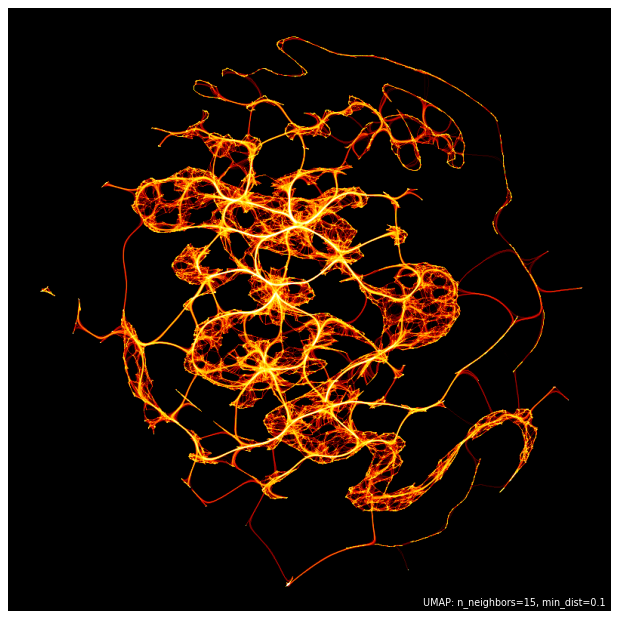

In [8]:
selected_record = 'SSC_6542_1.h5'
record = predictions[selected_record]
record.keys()
logits = record['logits']
target = record['true'].argmax(1).repeat(30)
labels = np.array([HYP_DICT[t] for t in target])
mapper = umap.UMAP().fit(logits)
umap.plot.connectivity(mapper, labels=labels, theme='fire', edge_bundling='hammer')
print(logits.shape)
print(target.shape)

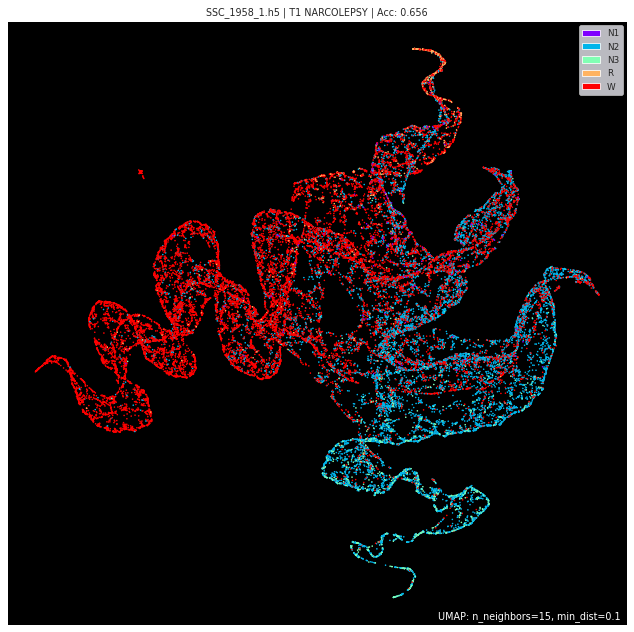

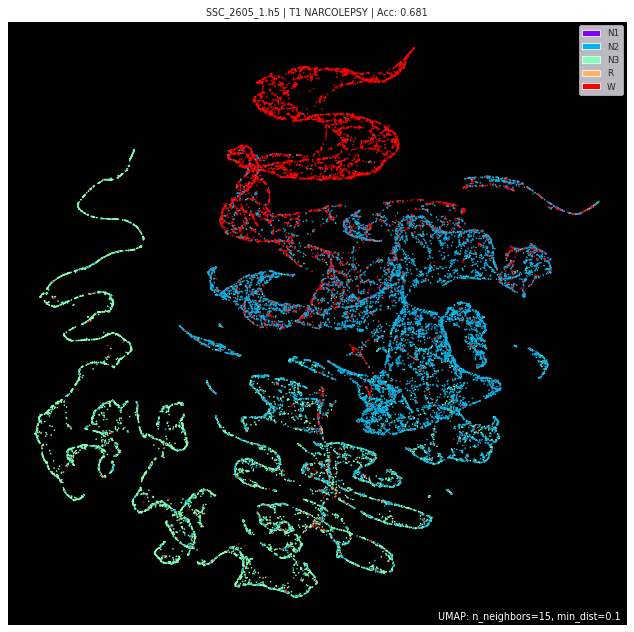

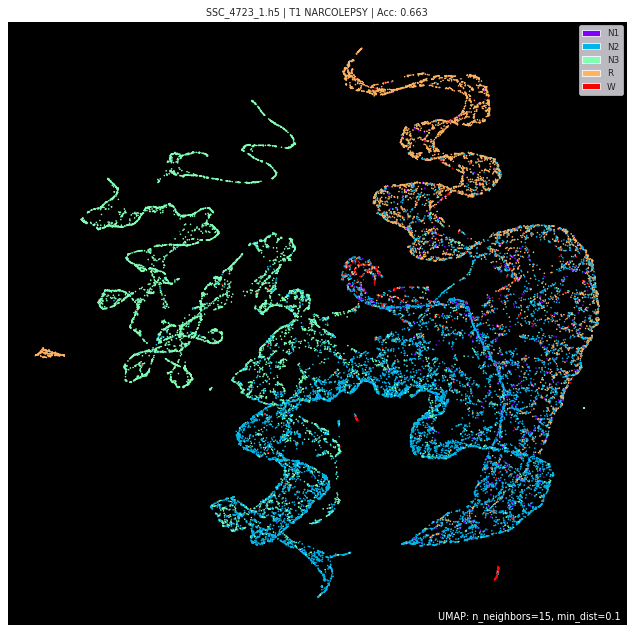

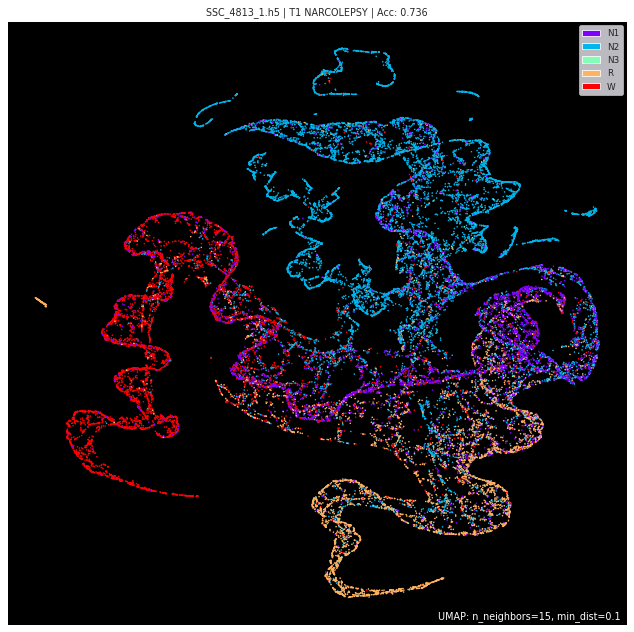

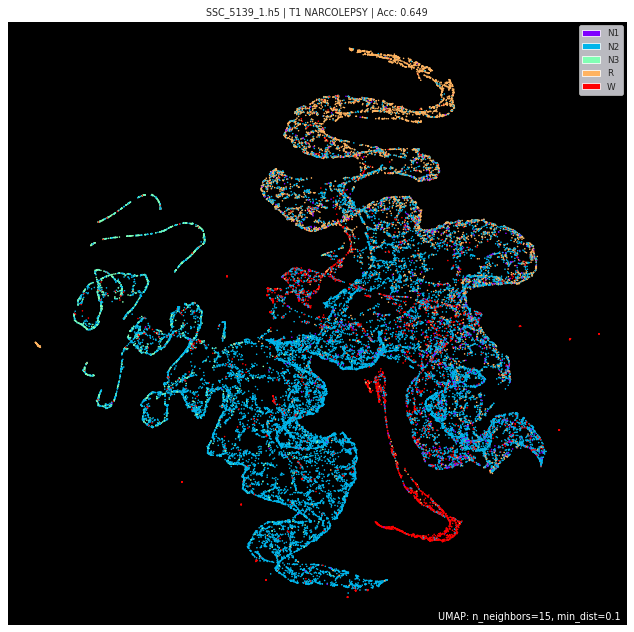

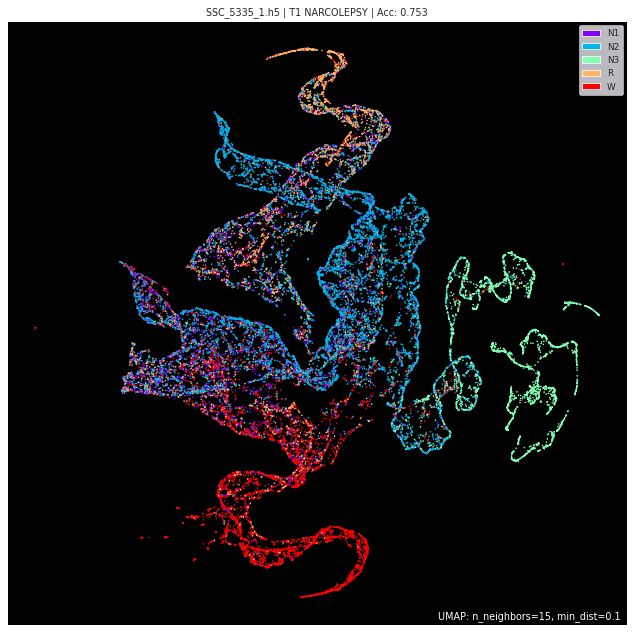

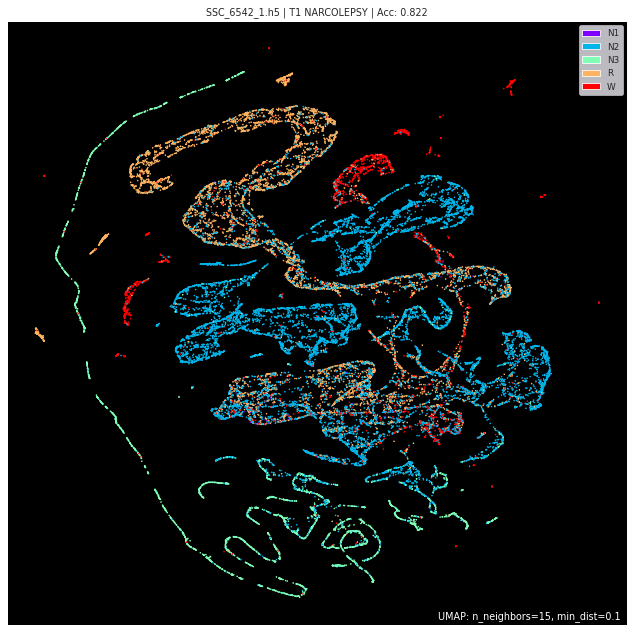

In [11]:
for idx, selected_record in df_preds.query('Label == 1').iterrows():
    fileid = selected_record['FileID']
    diagnosis = selected_record['Diagnosis'].replace("'", "")
    acc = selected_record['Accuracy']
    record = predictions[fileid]
    logits = record['logits']
    target = record['true'].argmax(1).repeat(30)
    labels = np.array([HYP_DICT[t] for t in target])
    mapper = umap.UMAP().fit(logits)
    umap.plot.points(mapper, labels=labels, theme='fire')
    title = (f"{fileid} | " +
             f"{diagnosis} | " +
             f"Acc: {acc:.3f}")
    plt.title(title)
    plt.savefig(f"results/umap/narco_{fileid.split('.')[0]}.png", dpi=300, bbox_inches='tight', pad_inches=0)

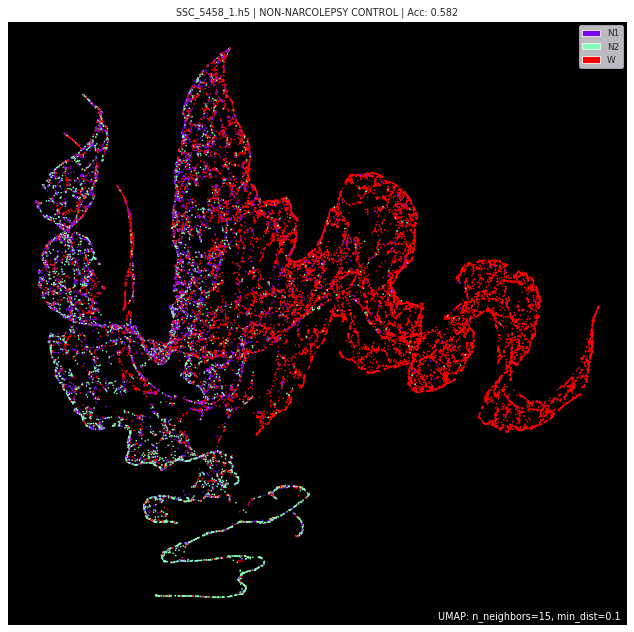

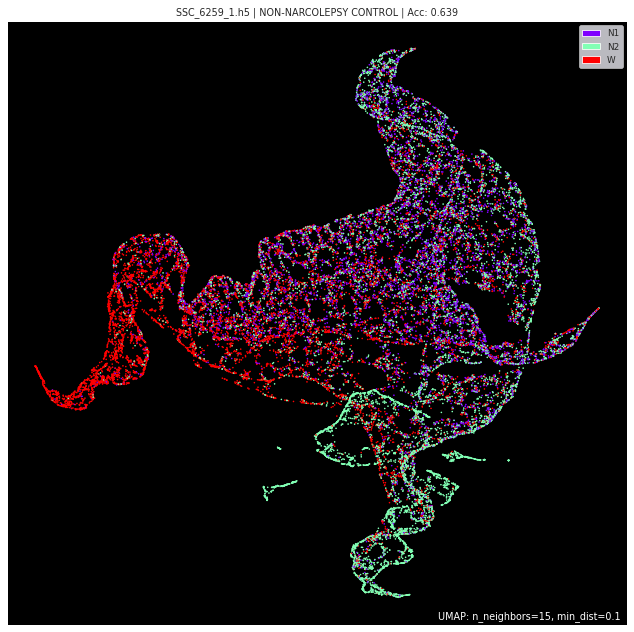

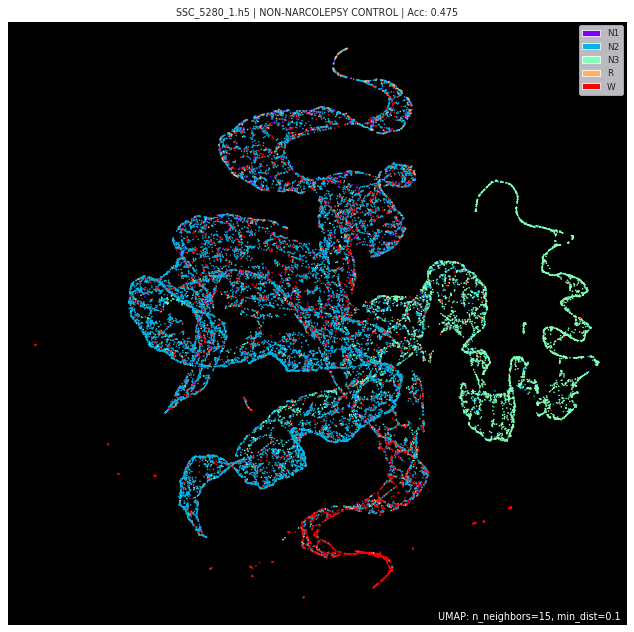

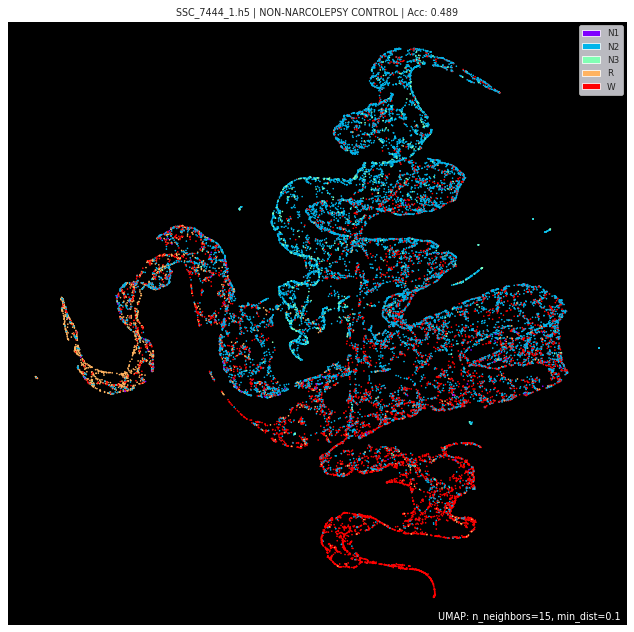

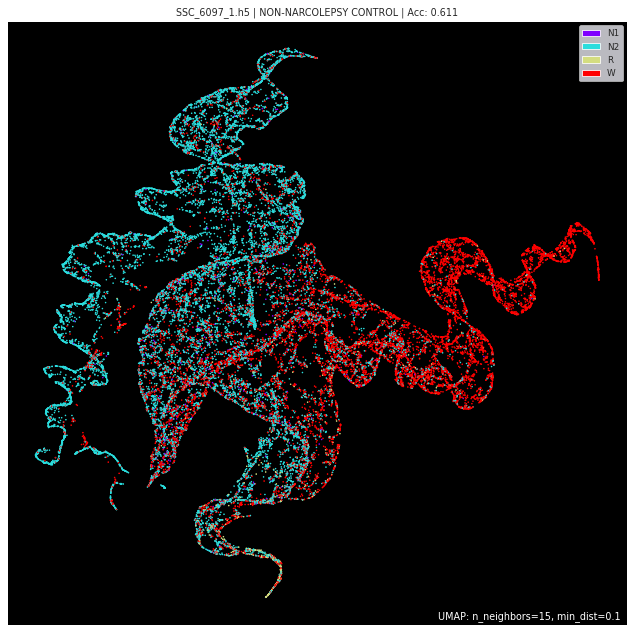

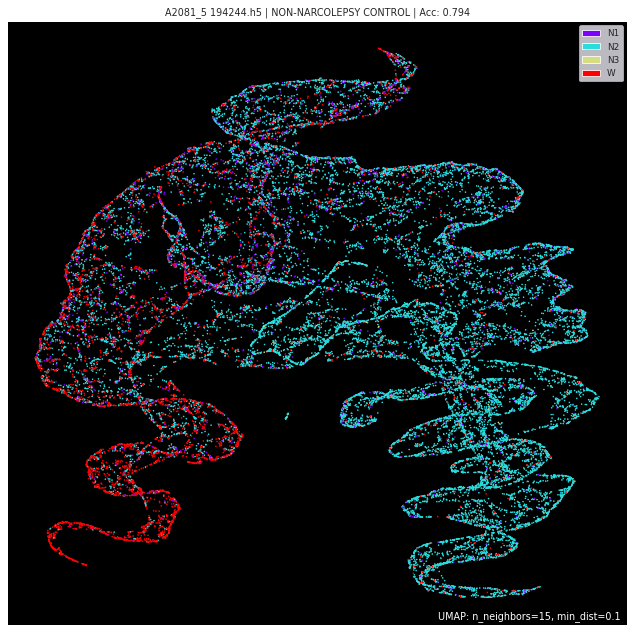

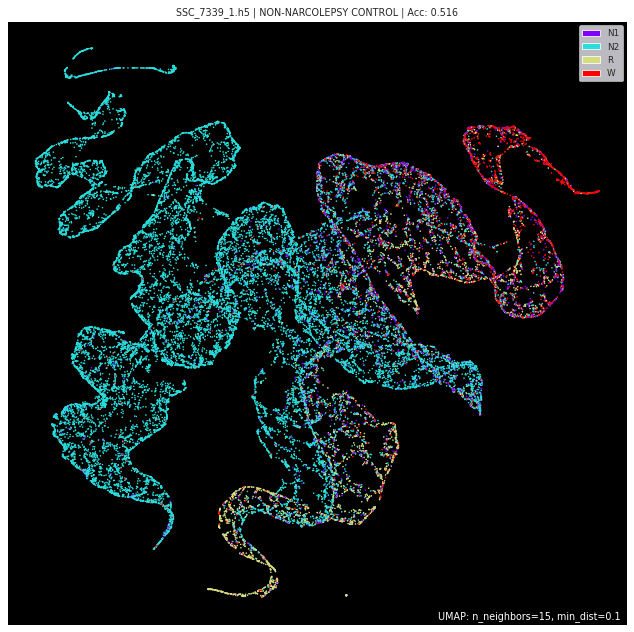

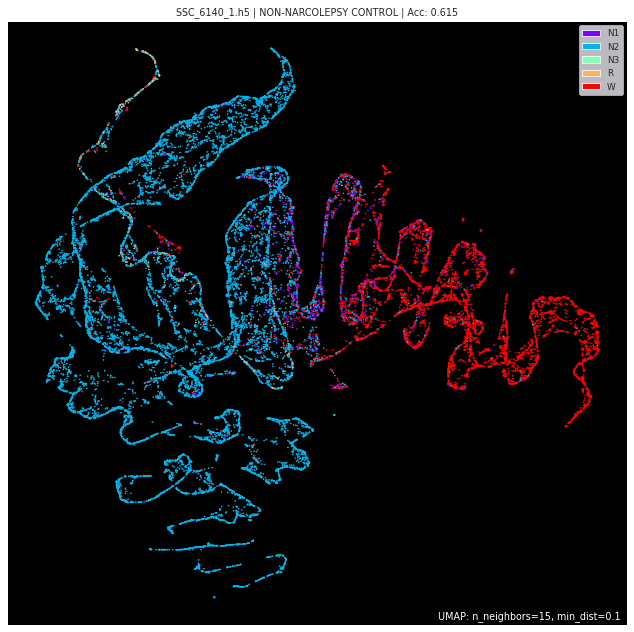

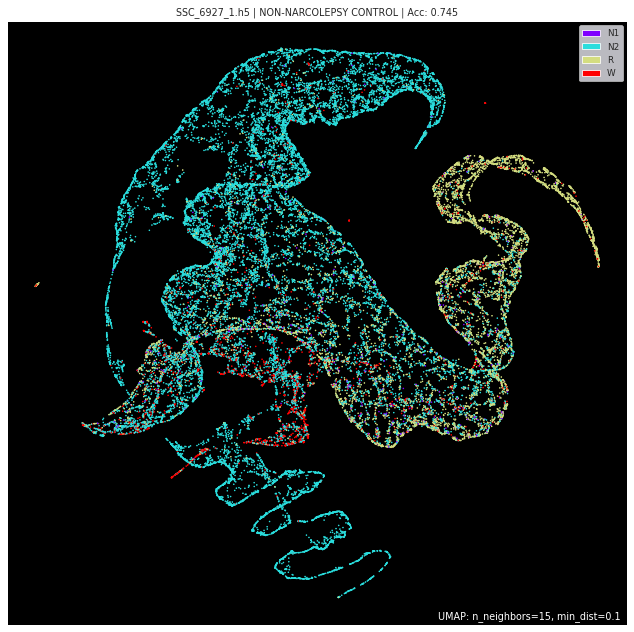

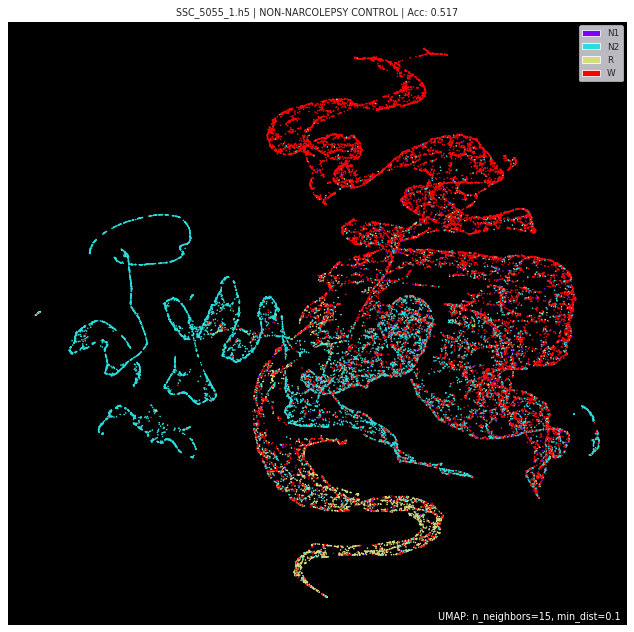

In [20]:
for idx, (_, selected_record) in enumerate(df_preds.query('Label == 0').sort_values(by='F1', ascending=True).iterrows()):
    if idx == 10:
        break
    fileid = selected_record['FileID']
    diagnosis = selected_record['Diagnosis'].replace("'", "")
    acc = selected_record['Accuracy']
    record = predictions[fileid]
    logits = record['logits']
    target = record['true'].argmax(1).repeat(30)
    labels = np.array([HYP_DICT[t] for t in target])
    mapper = umap.UMAP().fit(logits)
    umap.plot.points(mapper, labels=labels, theme='fire')
    title = (f"{fileid} | " +
             f"{diagnosis} | " +
             f"Acc: {acc:.3f}")
    plt.title(title)
#     plt.savefig(f"results/umap/control_{fileid.split('.')[0]}.png", dpi=300, bbox_inches='tight', pad_inches=0)

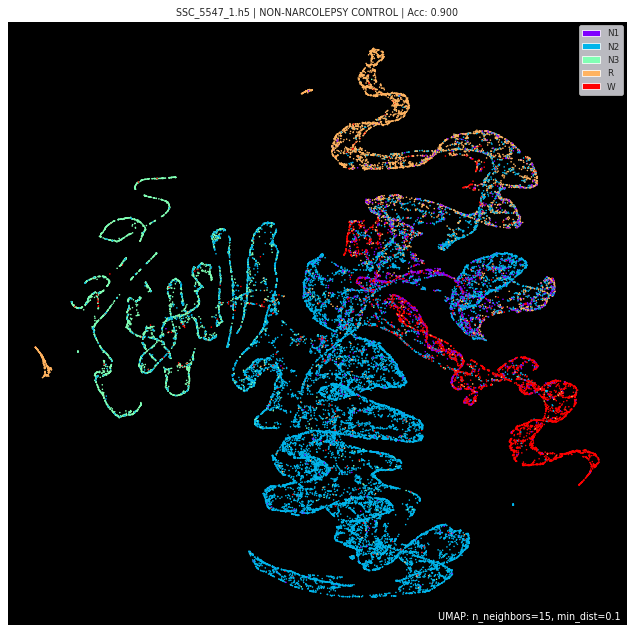

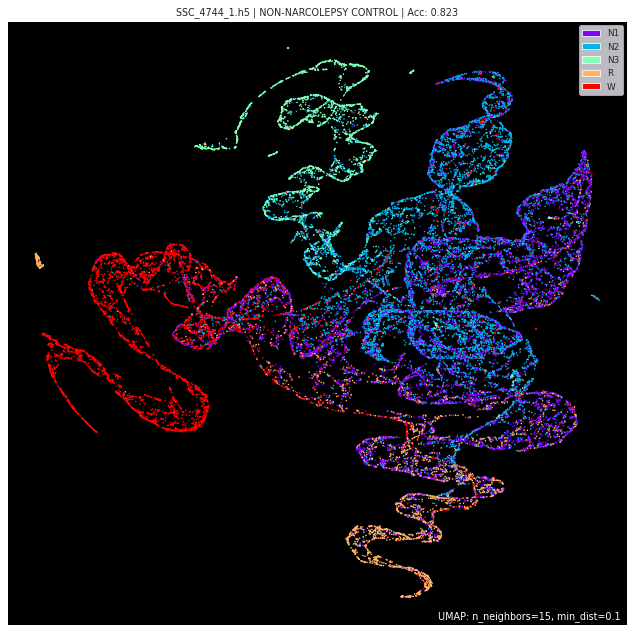

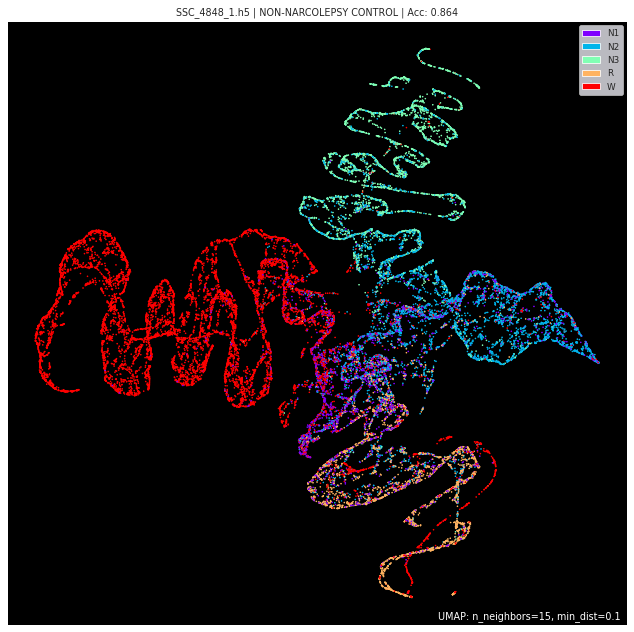

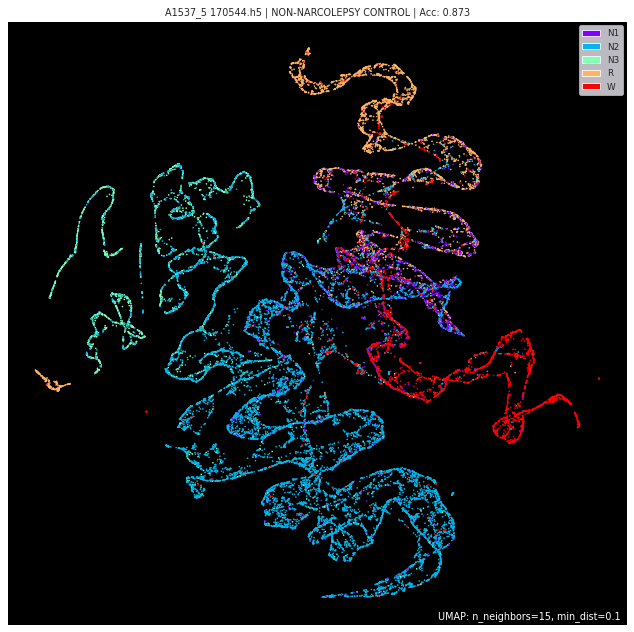

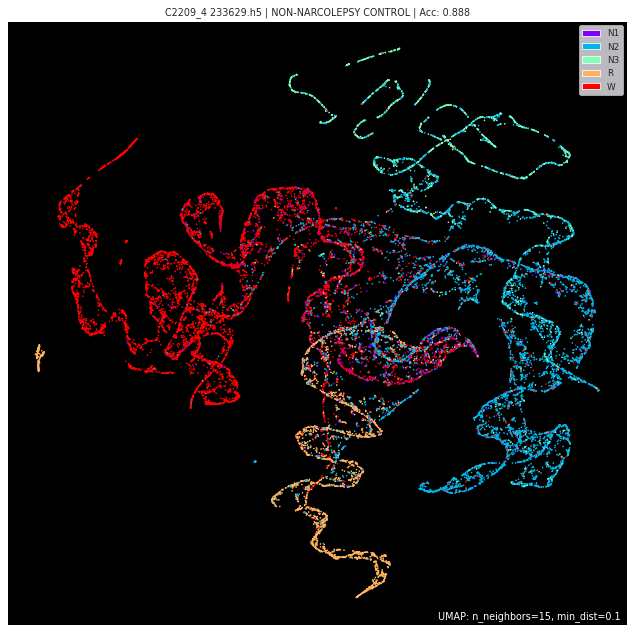

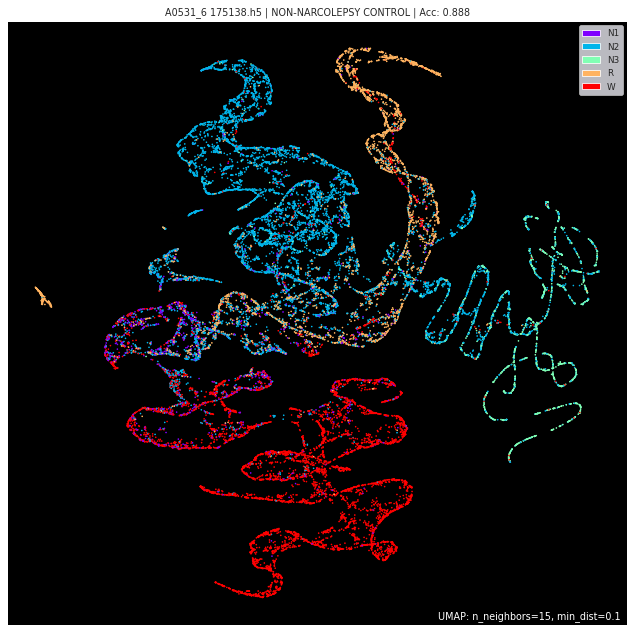

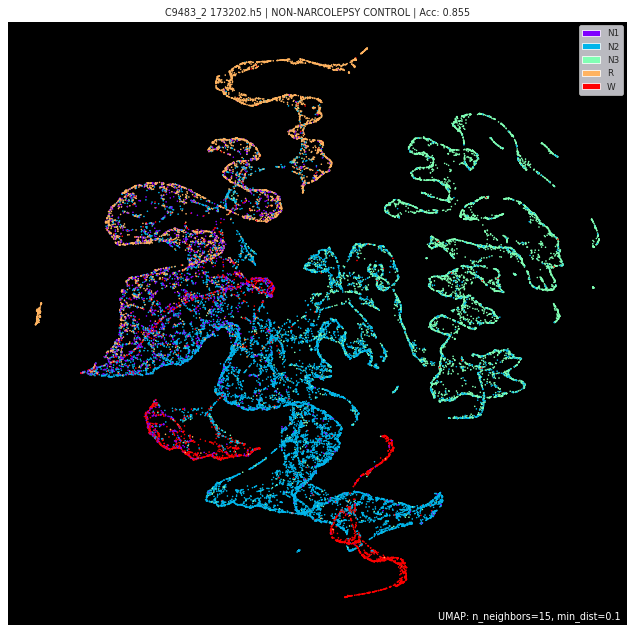

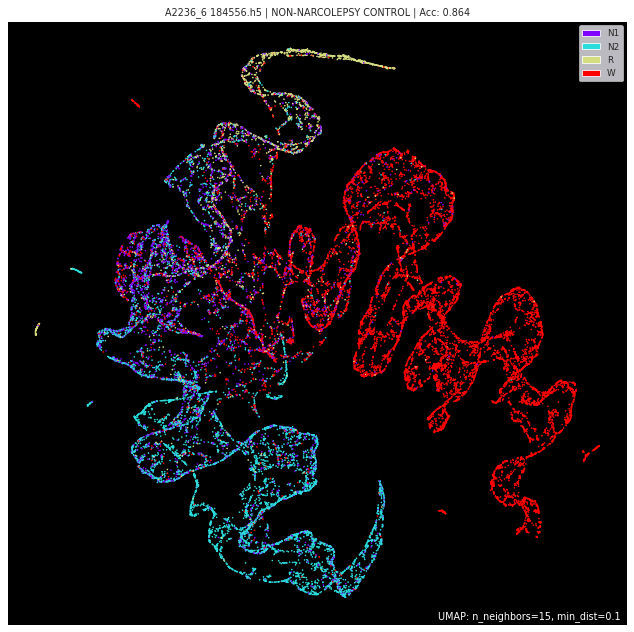

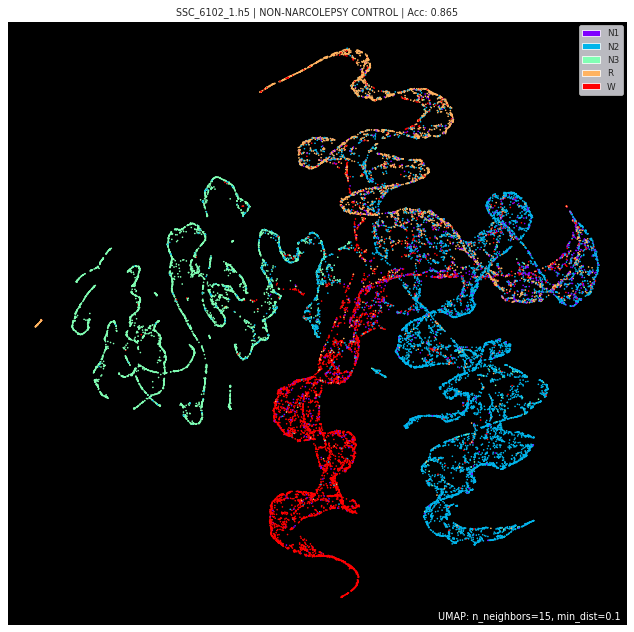

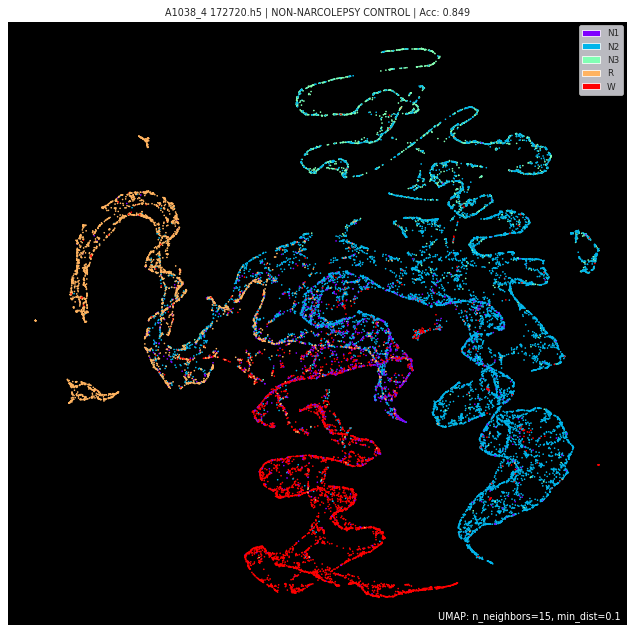

In [10]:
for idx, (_, selected_record) in enumerate(df_preds.query('Label == 0').sort_values(by='F1', ascending=False).iterrows()):
    if idx == 10:
        break
    fileid = selected_record['FileID']
    diagnosis = selected_record['Diagnosis'].replace("'", "")
    acc = selected_record['Accuracy']
    record = predictions[fileid]
    logits = record['logits']
    target = record['true'].argmax(1).repeat(30)
    labels = np.array([HYP_DICT[t] for t in target])
    mapper = umap.UMAP().fit(logits)
    umap.plot.points(mapper, labels=labels, theme='fire')
    title = (f"{fileid} | " +
             f"{diagnosis} | " +
             f"Acc: {acc:.3f}")
    plt.title(title)
    plt.savefig(f"results/umap/control_{fileid.split('.')[0]}.png", dpi=300, bbox_inches='tight', pad_inches=0)

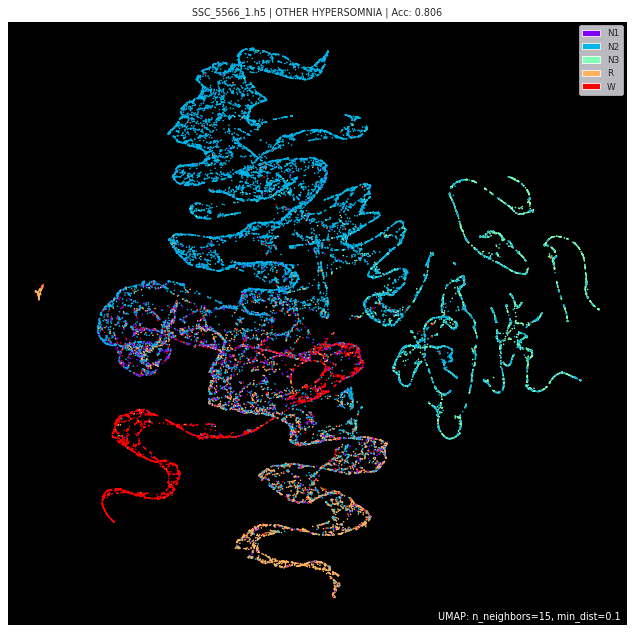

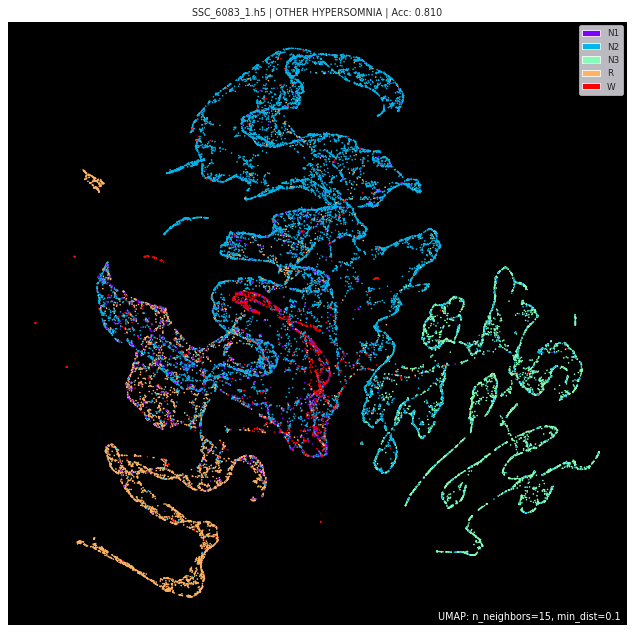

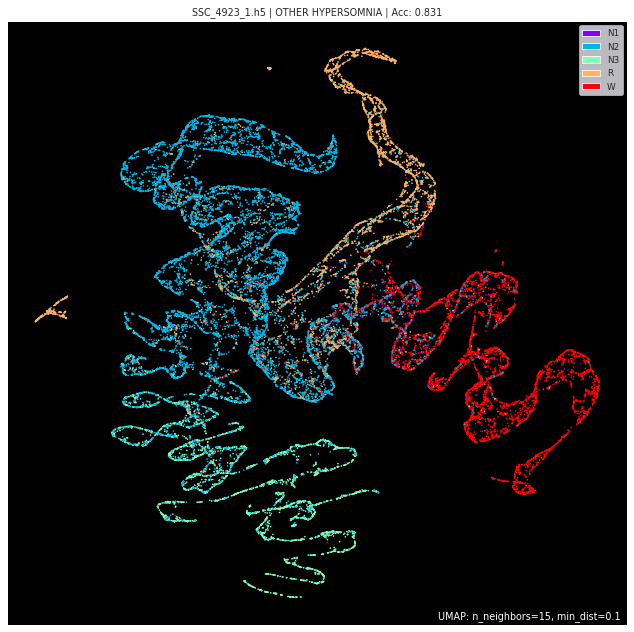

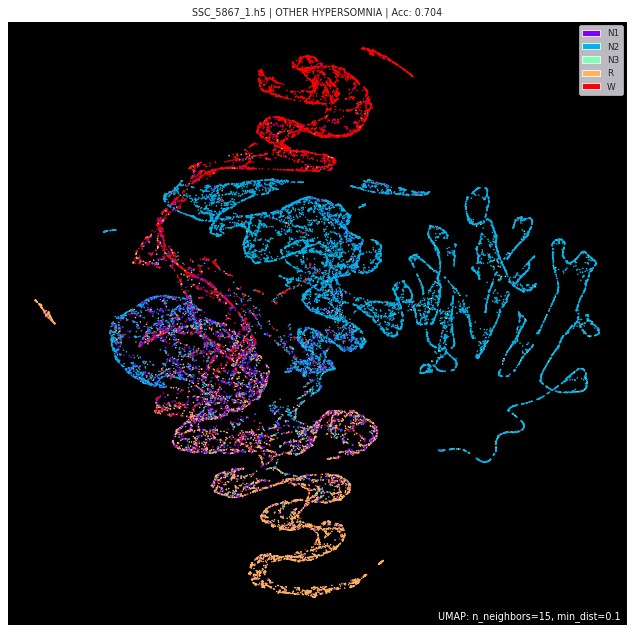

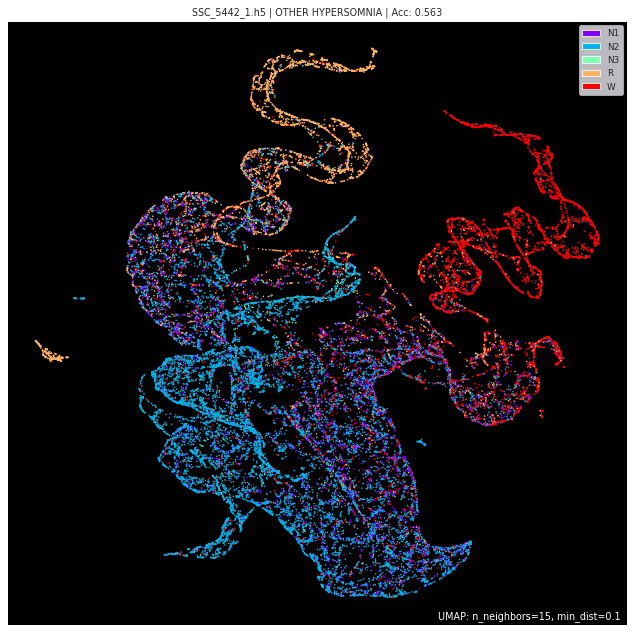

In [16]:
for idx, (_, selected_record) in enumerate(df_preds.loc[df_preds['Diagnosis'] == "'OTHER HYPERSOMNIA'"].sort_values(by='F1', ascending=False).iterrows()):
    if idx == 10:
        break
    fileid = selected_record['FileID']
    diagnosis = selected_record['Diagnosis'].replace("'", "")
    acc = selected_record['Accuracy']
    record = predictions[fileid]
    logits = record['logits']
    target = record['true'].argmax(1).repeat(30)
    labels = np.array([HYP_DICT[t] for t in target])
    mapper = umap.UMAP().fit(logits)
    umap.plot.points(mapper, labels=labels, theme='fire')
    title = (f"{fileid} | " +
             f"{diagnosis} | " +
             f"Acc: {acc:.3f}")
    plt.title(title)
    plt.savefig(f"results/umap/hypersomnia_{fileid.split('.')[0]}.png", dpi=300, bbox_inches='tight', pad_inches=0)

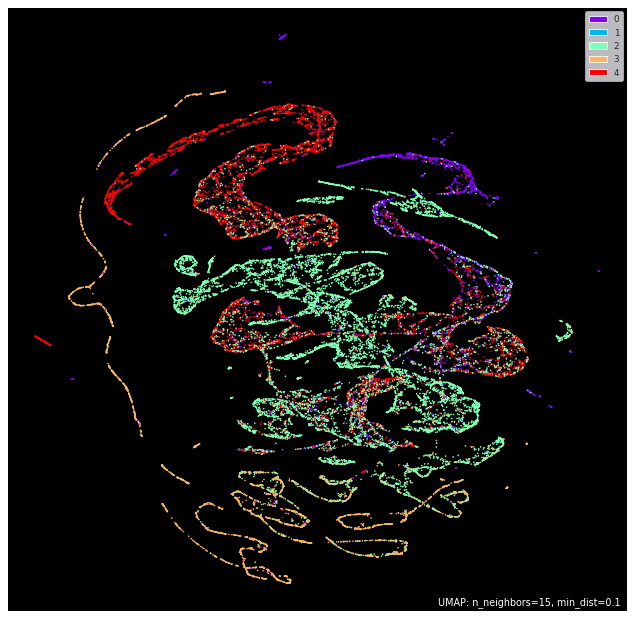

In [12]:
mapper = umap.UMAP().fit(logits)
umap.plot.points(mapper, labels=target, theme='fire')
plt.savefig(f'results/umap/narco_{selected_record}.png', dpi=300, bbox_inches='tight', pad_inches=0)